# Time Series Analysis
    * A series of data points collected in a time order is known as Time Series.

## Components
    1. Trend: 
        It is a general direction in which something is changing. Like increase or decrease in the sales market over time.
        
    2. Seasonality: 
        It is the condition where the pattern is repeating at a regular time interval.
        
#### Difference between the Time Series and Regression Problem:
    The main difference is that a time series is time dependent. So the basic assumption in the linear regression model that the   observation are independent doesn't hold for this case. Along with the increasing or decreasing trend, it also holds some seasonality trends i.e variations specific to a particular time frame. So, It is not a good approach of using regression techniques.

## Hypothesis Generation
    1. There will be increase in the traffic as the year passes.
    2. Traffic on the weekdays will be more than that in weekend(holidays.
    3. Tourism month time will be more traffic ratherthan other time.
    4. Traffic during the peek hours will be high. (mainly from 10AM - 5 PM)
    
We will try to validate each of these hypothesis with the dataset that we have been provided.

## Load the dataset with importing of required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
df_train = train.copy()
df_test = test.copy()

In [4]:
#Looking at the columns in both test and train dataset

display(df_train.columns)
display(df_test.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')

Index(['ID', 'Datetime'], dtype='object')

In [5]:
#Looking at the datatype of each features

display(df_train.dtypes)
display(df_test.dtypes)

ID           int64
Datetime    object
Count        int64
dtype: object

ID           int64
Datetime    object
dtype: object

In [6]:
#Looking at the shape of the dataset

display(df_train.shape)
display(df_test.shape)

(18288, 3)

(5112, 2)

## Feature Extraction

     As we see that the datetime feature was in object type. So, we need to convert it into the datetype data type.

In [7]:
df_train.head()
df_train['Datetime'] = pd.to_datetime(df_train.Datetime, format='%d-%m-%Y %H:%M')
df_test['Datetime'] = pd.to_datetime(df_test.Datetime, format='%d-%m-%Y %H:%M')

    We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, lets extract all these features.

In [8]:
for i in (df_train, df_test):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [9]:
df_train['day of a week'] = df_train['Datetime'].dt.dayofweek

In [10]:
df_train.head()

,ID,Datetime,Count,year,month,day,hour,day of a week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [11]:
#Let's seperate the weekends from the dataset and categorized them.

def weekend(row):
    if row.dayofweek==5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [12]:
temp = df_train['Datetime'].apply(weekend)
df_train['weekend'] = temp

In [13]:
df_train.head()

,ID,Datetime,Count,year,month,day,hour,day of a week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [14]:
#Droping the ID column as it is of no use.

df_train.drop(['ID'],axis=1,inplace=True)

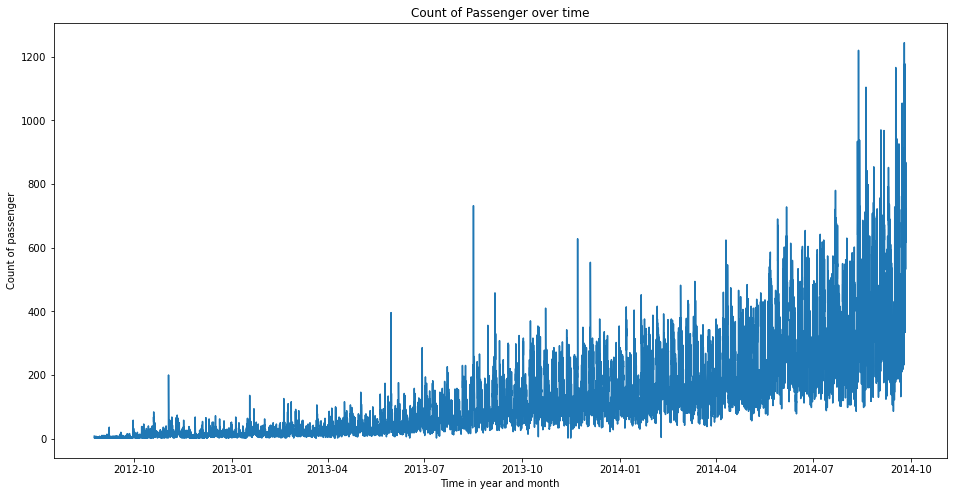

In [15]:
# Visualizing the count of passenger over time
df_train.index = df_train['Datetime'] # To get the time over x-axis
plt.figure(figsize=(16,8))
plt.plot(df_train['Count'])
plt.xlabel('Time in year and month')
plt.ylabel('Count of passenger')
plt.title('Count of Passenger over time')

train_original = df_train.copy()

## Exploratory Data Analysis

    Let us verify the hypothesis that we assumed before through our domain knowledge with the actual data we have got now.

#### 1. First hypothesis was traffic will increase over year.


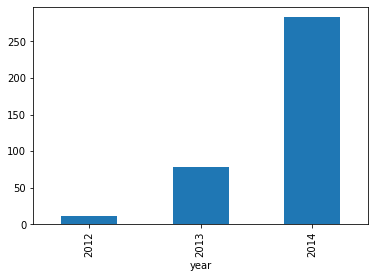

In [16]:
df_train.groupby('year')['Count'].mean().plot.bar()

    As we see there is an exponential growth in traffic over year. So, we have tested our first hypothesis as true.

#### 3. Our third hypothesis was more traffic during the tourism months

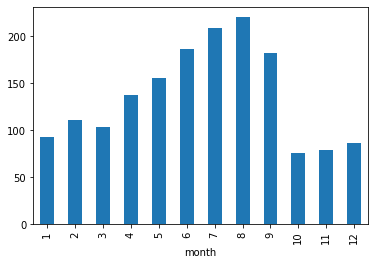

In [17]:
df_train.groupby('month')['Count'].mean().plot.bar()

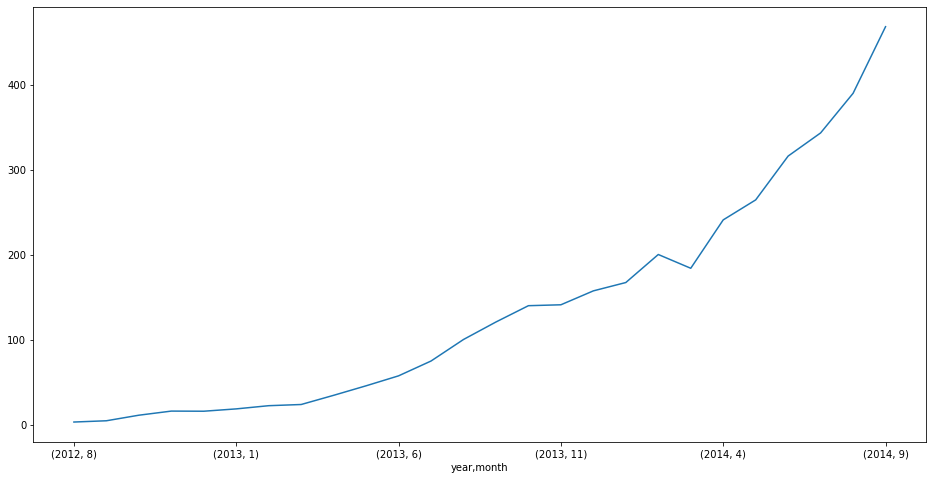

In [18]:
# Also lets see about the monthly mean for each year.

df_train.groupby(['year','month'])['Count'].mean().plot(figsize=(16,8)) #group by sequence matters. 

#### 2. Our second hypothesis was the traffic will be more at peek hours

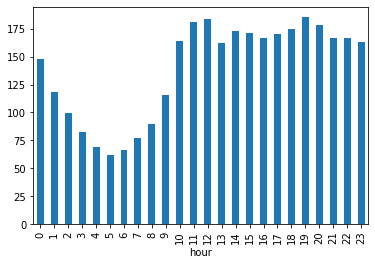

In [19]:
df_train.groupby('hour')['Count'].mean().plot.bar()

    If we see the plot the peak hour was 7 PM and it goes on decreasing till 5 AM and again increase till 11 AM and peek again between 11 AM and 12 PM.

#### 4. Our fourth hypothesis was that traffic will be more on weekdays.

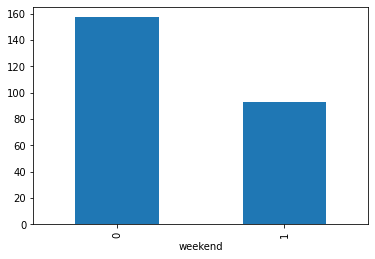

In [20]:
df_train.groupby('weekend')['Count'].mean().plot.bar()

    We can inferred that the traffic is high during weekdays ratherthan on weekend.

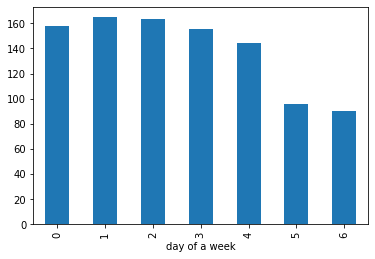

In [21]:
#Lets see with the day of a week about how a traffic is in a particular day

df_train.groupby('day of a week')["Count"].mean().plot.bar()

In [22]:
df_train.Timestamp = pd.to_datetime(df_train.Datetime, format='%d-%m-%Y %H:%M')
df_train.index = df_train.Timestamp

In [23]:
df_train.head()

,Datetime,Count,year,month,day,hour,day of a week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


    As we can see there is a lot of noise in the hourly time series data. So, we will aggregrate the hourly time series to daily, weekly and monthly time series to reduce the noise and make it more stable so that it will be easier for model to learn.

In [24]:
#hourly time series
hourly = df_train.resample('H').mean()
#Converting to daily mean
daily = df_train.resample('D').mean()
#Converting to weekly mean
weekly = df_train.resample('W').mean()
#Converting to monthly mean
monthly = df_train.resample('M').mean()

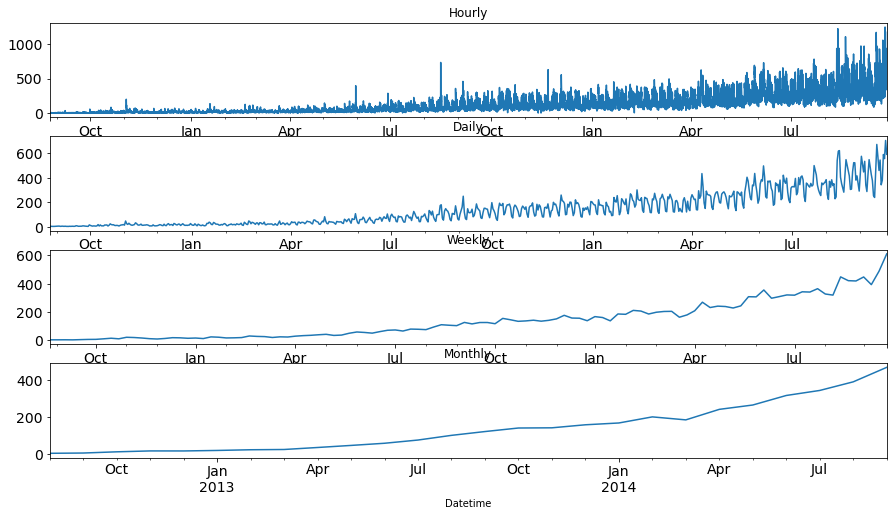

In [25]:
#Lets visualize in the plot

fig, ax = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8),title="Hourly",fontsize=14,ax=ax[0])
daily.Count.plot(figsize=(15,8),title="Daily",fontsize=14,ax=ax[1])
weekly.Count.plot(figsize=(15,8),title="Weekly",fontsize=14,ax=ax[2])
monthly.Count.plot(figsize=(15,8),title="Monthly",fontsize=14,ax=ax[3])

In [26]:
df_test.Timestamp = pd.to_datetime(df_test.Datetime, format='%d-%m-%Y %H:%M')
df_test.index = df_test.Timestamp

In [27]:
df_test.head()

,ID,Datetime,year,month,day,hour
Datetime,,,,,,
2014-09-26 00:00:00,18288,2014-09-26 00:00:00,2014,9,26,0
2014-09-26 01:00:00,18289,2014-09-26 01:00:00,2014,9,26,1
2014-09-26 02:00:00,18290,2014-09-26 02:00:00,2014,9,26,2
2014-09-26 03:00:00,18291,2014-09-26 03:00:00,2014,9,26,3
2014-09-26 04:00:00,18292,2014-09-26 04:00:00,2014,9,26,4


In [28]:
# We will be working with the daily data because to convert the monthly and weekly to hourly data is a long process.

df_train = df_train.resample('D').mean()

In [29]:
df_train.head()

,Count,year,month,day,hour,day of a week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


## Modelling Techniques and Evaluation 

In [30]:
#Dividing the dataset into train and validation sets

train = df_train.loc['2012-08-25':'2014-06-24']
validate = df_train.loc['2014-06-25':'2014-09-25']

Text(0, 0.5, 'Passenger Count')

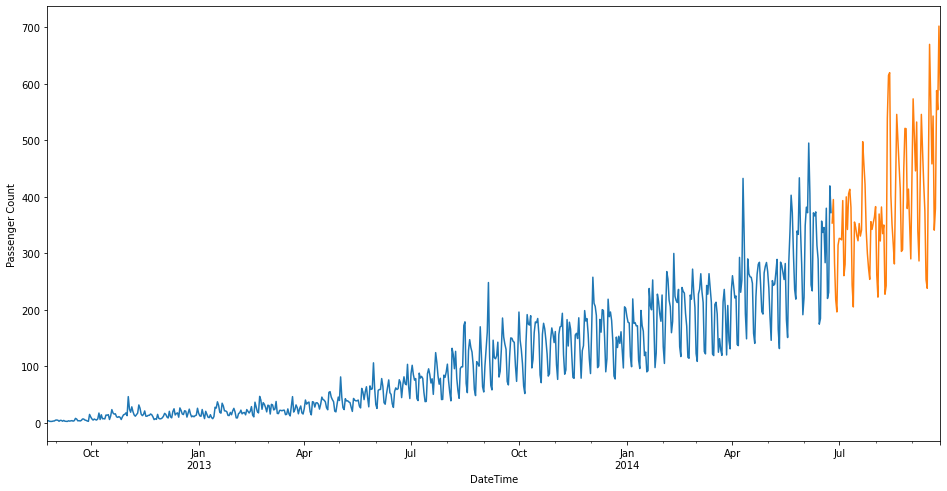

In [31]:
train.Count.plot(figsize=(16,8),label='Train')
validate.Count.plot(figsize=(16,8),label='Validate')
plt.xlabel('DateTime')
plt.ylabel('Passenger Count')

### Different Modeling Techniques

### 1. Naive Approach:
    In this forecasting technique, we assumed that the next expected point will be equal to the last observed point. So we expect the straight horizontal line as the prediction. Since, this approach is not suitable for the high variability dataset so we dont use this often. 

### 2. Moving Average:
    In this, we take an average of the passenger counts for last few time periods only.

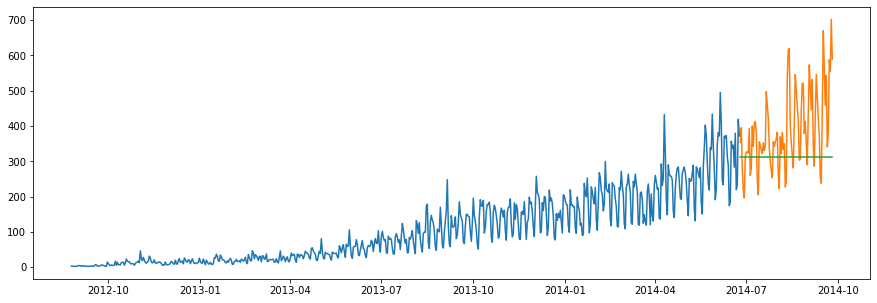

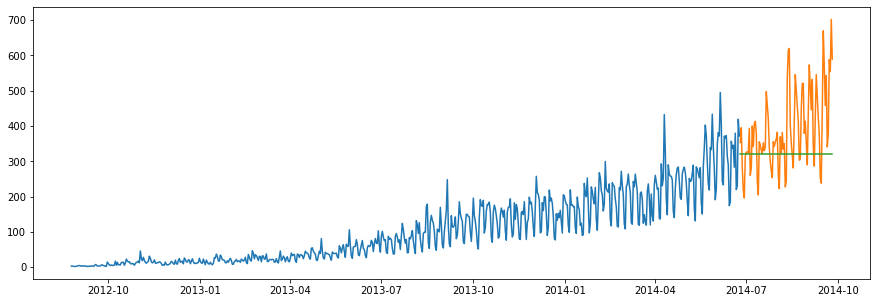

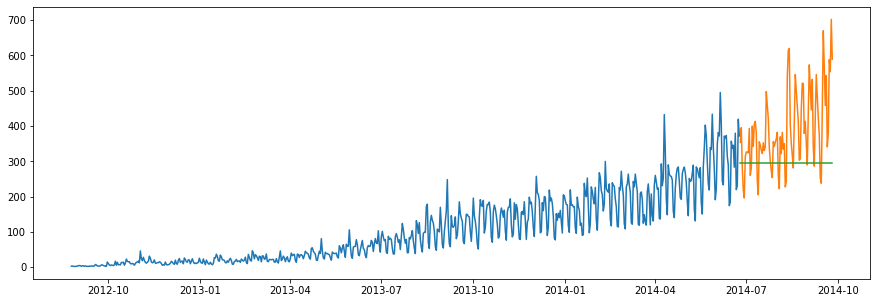

In [32]:
# Lets try the rolling mean for last 10,20 and 50 days and visualize the result.

#For 10 days
y_hat_avg = validate.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(10).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(train['Count'], label='Train')
plt.plot(validate['Count'], label='Validate')
plt.plot(y_hat_avg['moving_avg_forecast'])

#For 20 days
y_hat_avg = validate.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(20).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(train['Count'], label='Train')
plt.plot(validate['Count'], label='Validate')
plt.plot(y_hat_avg['moving_avg_forecast'])

#For 50 days
y_hat_avg = validate.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(50).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(train['Count'], label='Train')
plt.plot(validate['Count'], label='Validate')
plt.plot(y_hat_avg['moving_avg_forecast'])

    From the above analaysis, we can see that the predictions are getting weaker as we increase the number of observations.

### 3. Simple Exponential Smoothing
    In this technique, we assign the larger weights to more recent observations than the observations from the distant part.
    
### 4. Holt's Linear trend Model
    It is the extension of the Simple Exponential Smoothing to allow forcasting of data with a trend.
    
### 5. Holt Winter's Model
    The above mention models doesn't take seasonality in account. So, in order to take in account both trend and seasonality, we use this model. Here we apply the Exponential smoothing to the seasonal components.
    
    Here, we are using the different models for seasonality and trends. So, to use the model which consider both the seasonality and trend, we come up with the ARIMA Model.

### 6. ARIMA Model
      It stands for Auto Regressive Integrated Moving Average. It is specified by three parameters (p,q,d).
  * p : order of autoregressive model (number of lags)
  * q : order of moving average.
  * d : degree of differencing
  
         It is mainly for a stationary time series which is nothing but a linear equation.
#### Stationary Time Series:
    There are mainly 3 criterion for a series to be stationary.
  * Mean should be constant i.e shouldn't be the function of time.
  * Variance of the time series shouldn't be the function of time.
  * Shouldn't have trend and seasonality.
 
We make the series stationary to make the variable independent. So, if the time series is not stationary, our first job is to make them stationary. For this, we need to remove the trend and seasonality from the data. 

### Parameter tunning for ARIMA Model
    First we check whether the time series is stationary or not.
  #### Stationary Check:
  * We use the Dickey Fuller Test to check the stationary of the series.
  * The main objective of this test is to determined how strongly is a time series defined by the trend.
  * The null hypothesis says the time series is not stationary.
  * The alternative hypothesis says the titme series is stationary.
  
We interpret the result using the test statistic and the critical value. If the Test Statistic is less than the Critical Value, we reject the null hypothesis else we accept.

#### Dickey Fuller Test

In [35]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plotting rolling statistics
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Standard Deviation')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
    
    

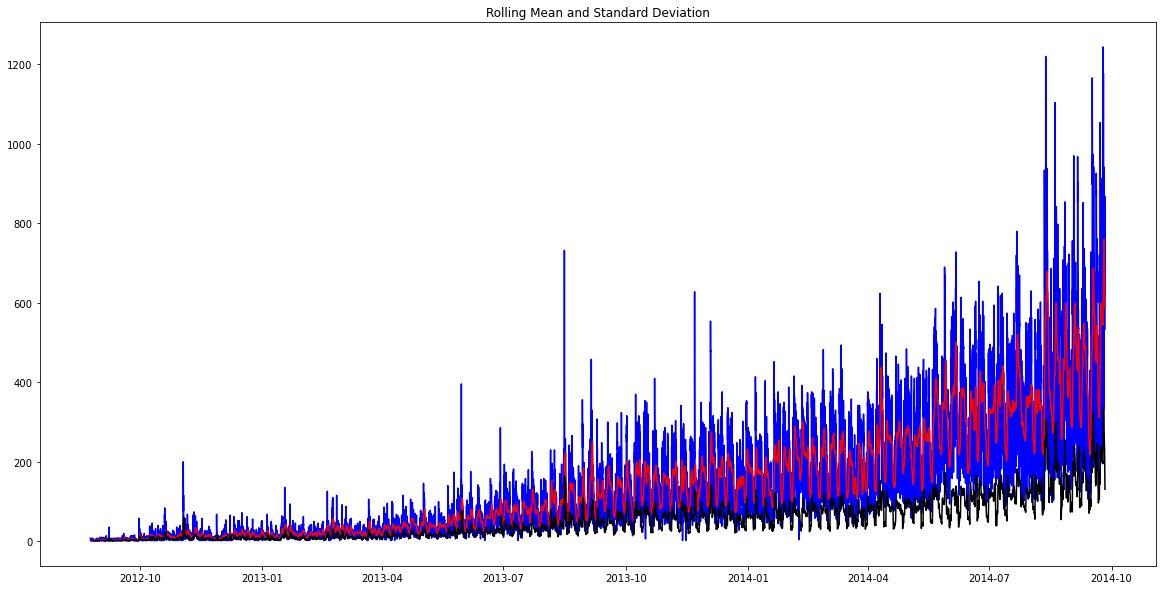

ADF Test Statistic : -4.456560536856825
p-value : 0.00023540466467665176
#Lags Used : 45
Number of Observations Used : 18242
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [36]:
adfuller_test(train_original['Count'])

### Removing the Seasonality and Trend

#### 1. Trend
       We can see the increasing trend in the data. So, we can apply the transformation whch penalizes higher values to more smaller values. For eg: log transformation
        
      We can take the rolling average here to remove the trend. We are using the window size of 24 knowing a day has 24 hours

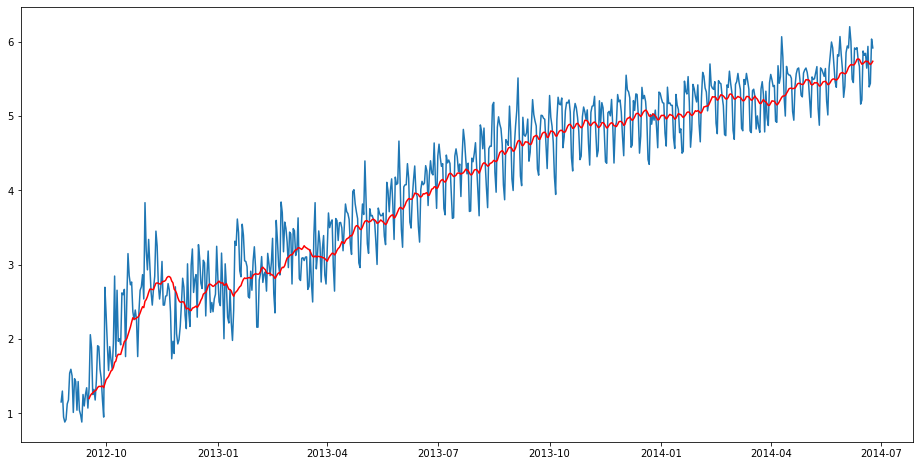

In [37]:
train_log = np.log(train['Count'])
validate_log = np.log(validate['Count'])

moving_avg = train_log.rolling(24).mean()

plt.figure(figsize=(16,8))
plt.plot(train_log)
plt.plot(moving_avg,color='red')

In [38]:
train_log_moving_avg_difference = train_log - moving_avg


In [39]:
#Since, we took the average of 24values so the first 23 values are null. So, lets drop that

train_log_moving_avg_difference.dropna(inplace=True)

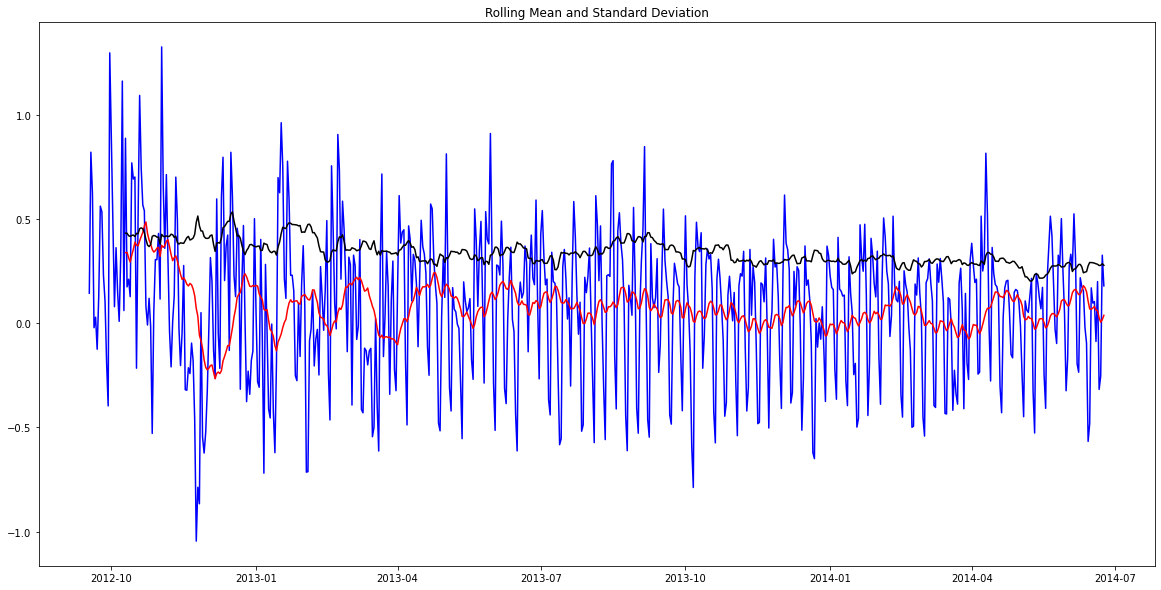

ADF Test Statistic : -5.861645522775965
p-value : 3.3994222693861207e-07
#Lags Used : 20
Number of Observations Used : 625
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [40]:
adfuller_test(train_log_moving_avg_difference)

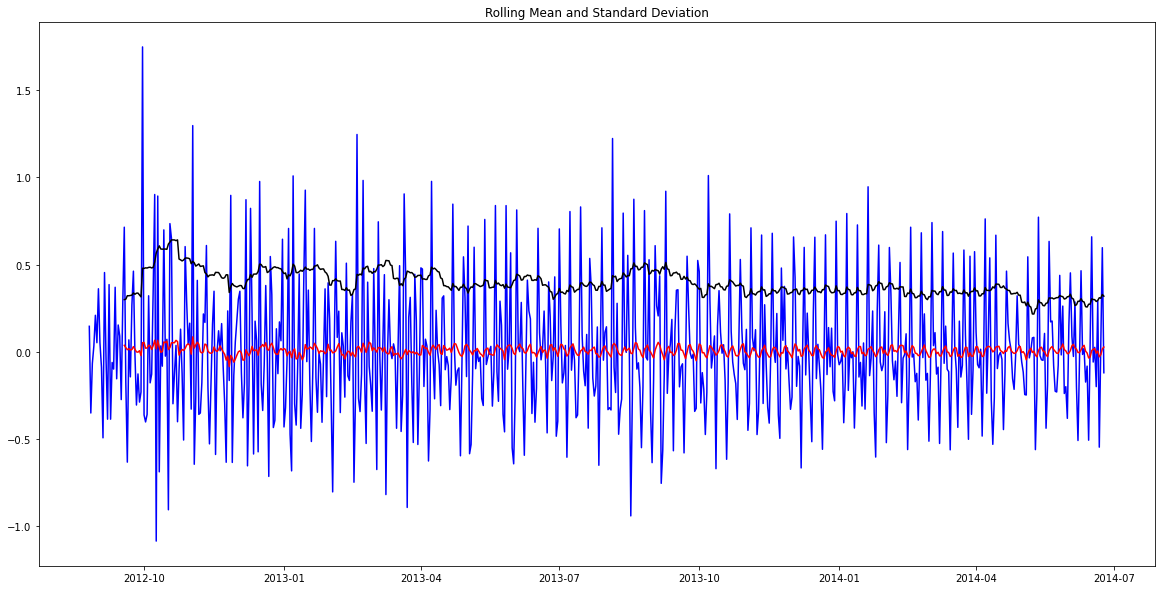

ADF Test Statistic : -8.237567849678873
p-value : 5.834049398271651e-13
#Lags Used : 19
Number of Observations Used : 648
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [41]:
#Now, lets stabalize the mean of time series data and differencing can help to make the series stable and remove the trend

train_log_diff = train_log - train_log.shift(1)
adfuller_test(train_log_diff.dropna())

#### 2. Seasonality
            By Seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (quater, month ,year, day of a week). Seasonality is always fixed. We are going to use the seasonal decompose to decompose time series into trend, seasonality and residuals.

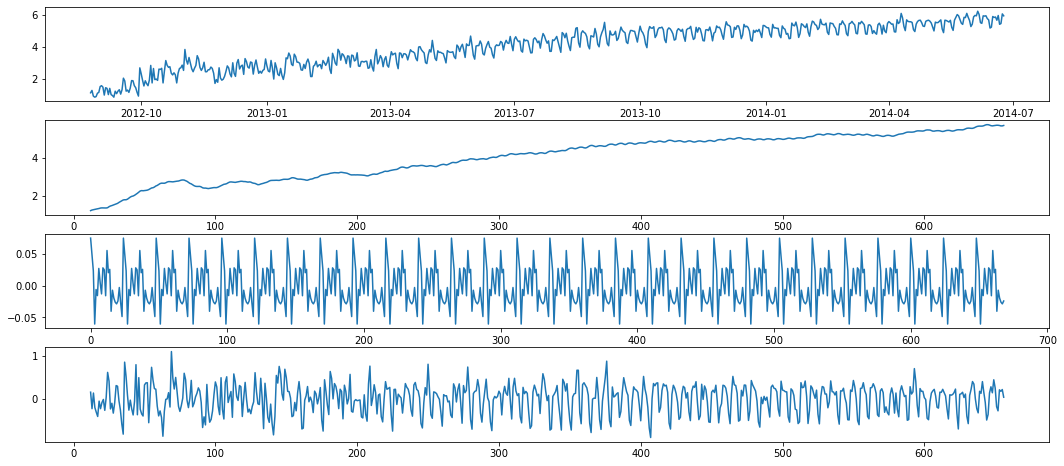

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(pd.DataFrame(train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

plt.figure(figsize=(18,8))

plt.subplot(411)
plt.plot(train_log, label='Original')

plt.subplot(412)
plt.plot(trend, label ='Trend')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')

plt.subplot(414)
plt.plot(residuals, label = 'Residuals')


In [43]:
#We have done the stationary test for the trend and seasonality. Now, lets check for the residuals.

train_log_decompose = pd.DataFrame(residuals)
train_log_decompose['date'] = train_log.index
train_log_decompose.set_index('date',inplace=True)

In [44]:
train_log_decompose.dropna(inplace=True)

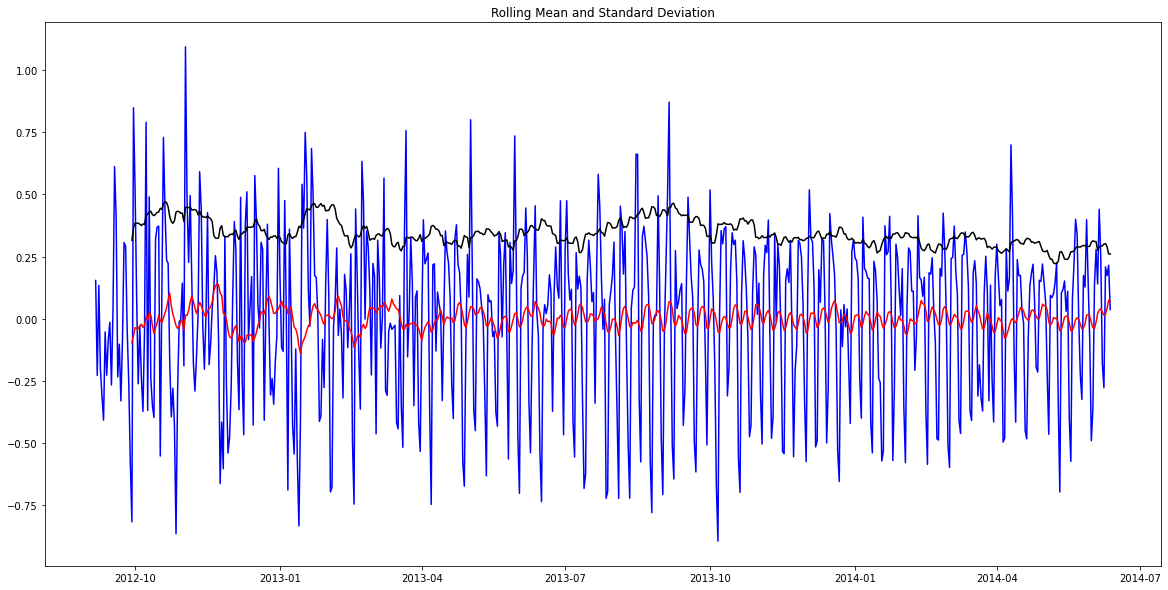

ADF Test Statistic : -7.8220960394083265
p-value : 6.628320880211865e-12
#Lags Used : 20
Number of Observations Used : 624
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [45]:
adfuller_test(train_log_decompose)

##### From all the test it can be verify the trend, seasonality and residuals are stationary.

### Forecasting the model using ARIMA Now
        For fitting the ARIMA model in our time series data we need p,q and d and for finding the optimized values of these parameters we are going to use the ACF and PACF graphs.
        
#### Note:
   * ACF is the measure of correlation between the timeseries with its lagged version of itself.
   * PACF is the measure of correlation between the timeseries with the lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

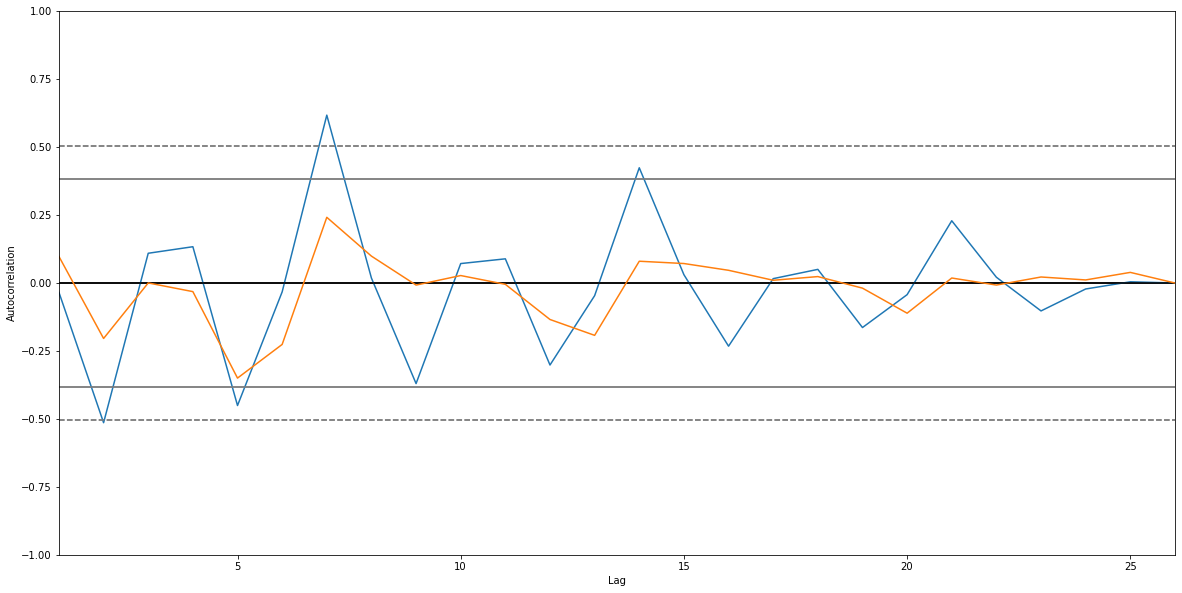

In [46]:
from statsmodels.tsa.stattools import acf, pacf
from pandas.plotting import autocorrelation_plot

lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

autocorrelation_plot(lag_acf)
autocorrelation_plot(lag_pacf)

#### Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.
   * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

Identification of an MA model is often best done with the ACF rather than the PACF.

   * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.



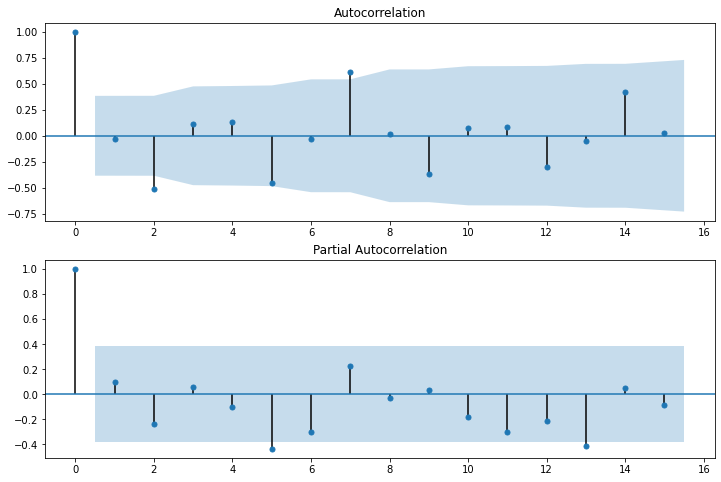

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(lag_acf,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(lag_pacf,ax=ax2)

### AR Model
    The auto regressive model implies that the output variables depeneds linearly on its previous values.

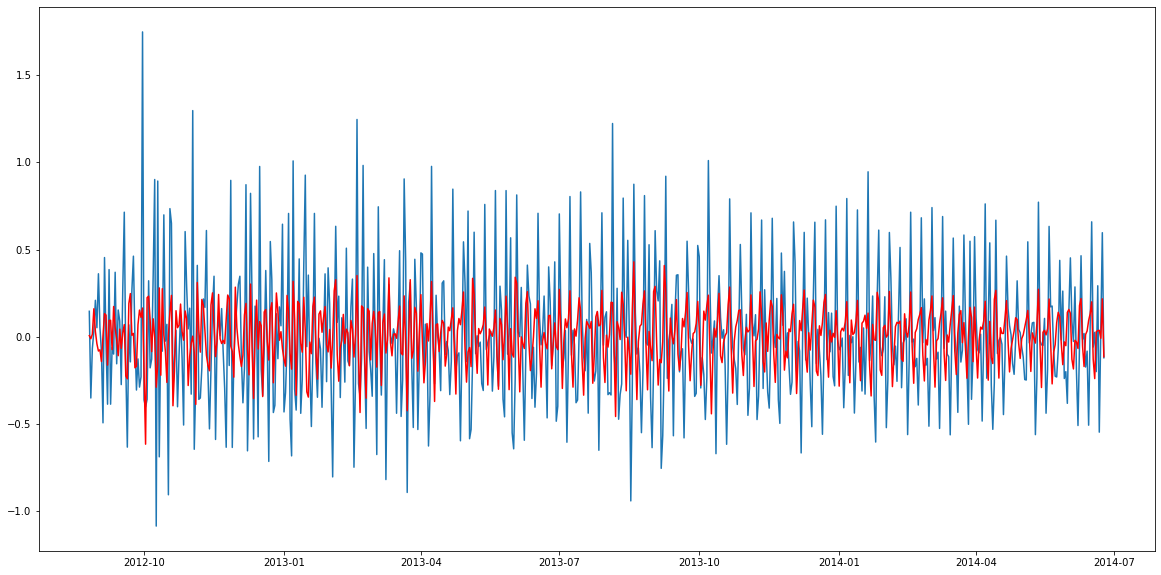

In [48]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_log, (2,1,0))

result_AR = model.fit()

plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(result_AR.fittedvalues, color='red', label='Predictions')

### MA Model
    It depicts that the output variable depends linearly on the current and various past values of a imperfectly predictable terms.

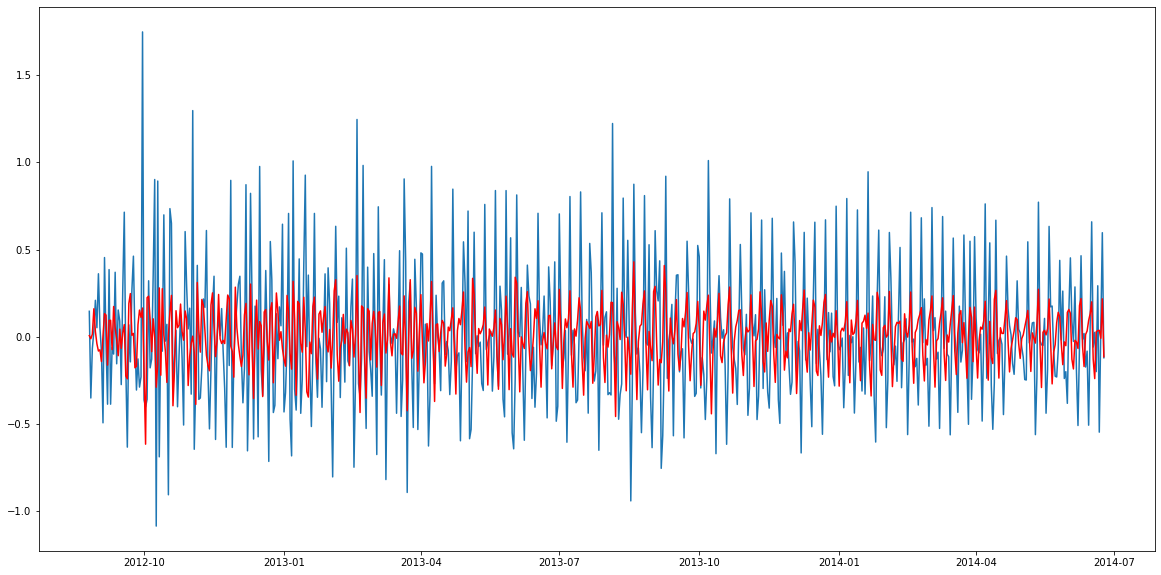

In [49]:
model = ARIMA(train_log, (0,1,2))

result_MA = model.fit()

plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(result_AR.fittedvalues, color='red', label='Predictions')

### Combined Model
    We need to keep in mind that ARIMA model is only used for non-seasonal data.

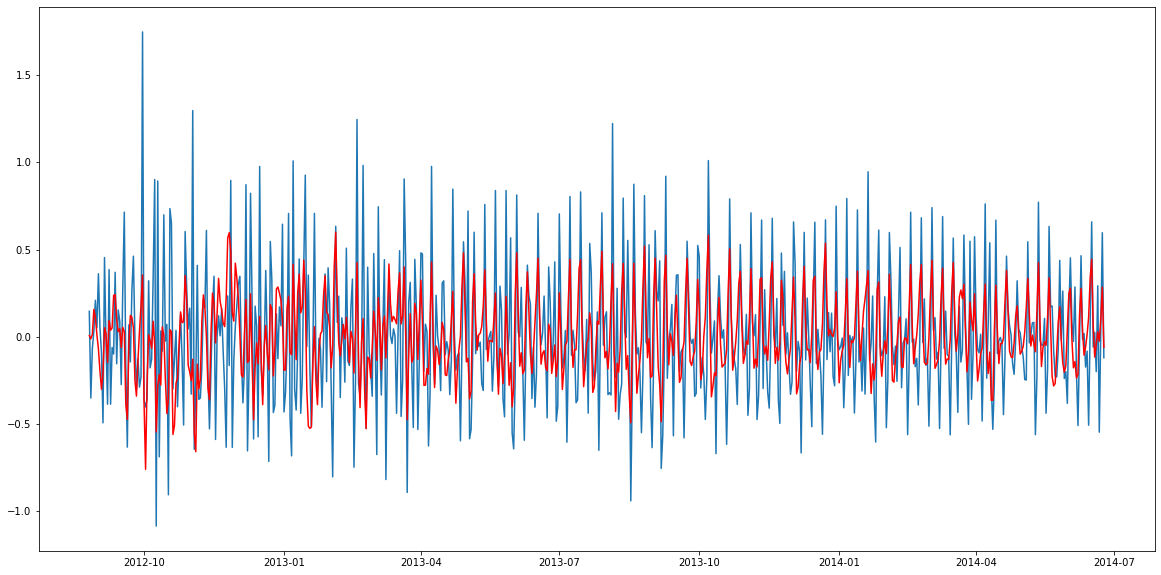

In [65]:
model = ARIMA(train_log,order = (2,1,2))
result_ARIMA = model.fit()

plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(result_ARIMA.fittedvalues, color='red', label='Predictions')

In [66]:
result_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Count   No. Observations:                  668
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -187.605
Method:                       css-mle   S.D. of innovations              0.320
Date:                Mon, 25 Jan 2021   AIC                            387.210
Time:                        19:41:18   BIC                            414.236
Sample:                    08-26-2012   HQIC                           397.680
                         - 06-24-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0069      0.002      4.153      0.000       0.004       0.010
ar.L1.D.Count     0.2327      0.118      1.968      0.049       0.001       0.464
ar.L2.D.Count    -0.2207      0.066     -3.344      0.001      -0.350      -0.091
ma.L1.D.Count    -0.6643      0.120     -5.549      0.000      -0.899      -0.430
ma.L2.D.Count    -0.2044      0.114     -1.793      0.073      -0.428       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5270           -2.0622j            2.1284           -0.2102
AR.2            0.5270           +2.0622j            2.1284            0.2102
MA.1            1.1197           +0.0000j            1.1197            0.0000
MA.2           -4.3702           +0.0000j            4.3702            0.5000
-----------------------------------------------------------------------------
"""

In [77]:
ARIMA_Predict = result_ARIMA.predict(start='2014-06-25', end='2014-09-25')
ARIMA_Predict = ARIMA_Predict.cumsum().shift().fillna(0)
ARIMA_Predict1 = pd.Series(np.ones(validate.shape[0]) * np.log(validate['Count'])[0], index=validate.index)
ARIMA_Predict1 = ARIMA_Predict1.add(ARIMA_Predict, fill_value=0)
ARIMA_Predict = np.exp(ARIMA_Predict1)
ARIMA_Predict

Datetime
2014-06-25    353.666667
2014-06-26    296.234555
2014-06-27    297.461220
2014-06-28    311.750389
2014-06-29    317.046570
                 ...    
2014-09-21    562.203226
2014-09-22    566.109523
2014-09-23    570.042962
2014-09-24    574.003731
2014-09-25    577.992021
Freq: D, Length: 93, dtype: float64

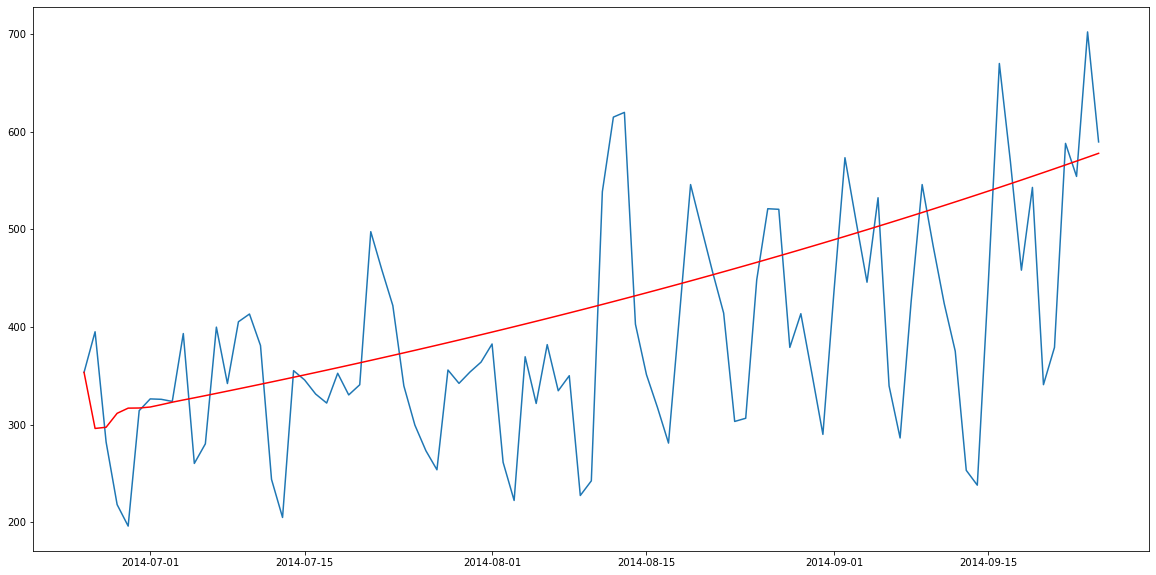

In [78]:
Predict1 = np.exp(validate['forecast'])

plt.plot(validate['Count'])
plt.plot(ARIMA_Predict,color='red')

In [136]:
model=sm.tsa.statespace.SARIMAX(train['Count'],order=(2, 1, 4),seasonal_order=(0,1,1,7))
results=model.fit()

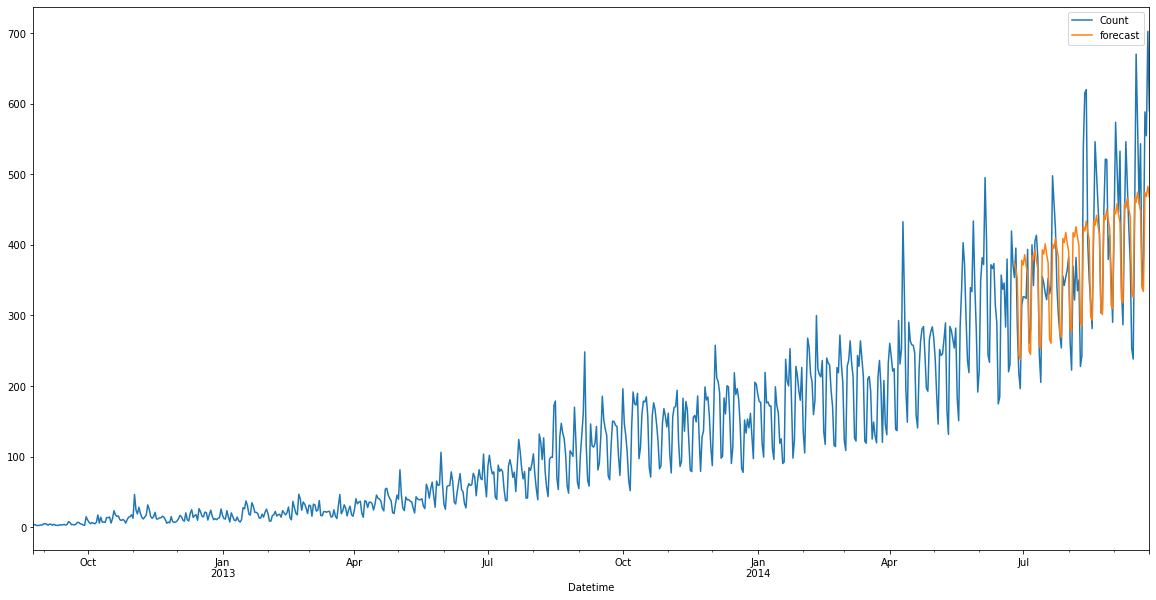

In [137]:
df_train['forecast'] = results.predict(start='2014-06-25', end='2014-09-25')
df_train[['Count','forecast']].plot()